# Semester Project
##### Jeff Sharpe, Rachel Pullen, Jackie Woodlief

We are trying to figure out if loans are actually given to people who need it!

Step 1: How do you tell if someone needs a loan or not?

Use the downloaded dataset to fit a ML alg and test on KIVA data sets

Look at loan data in Pakistan and reasons why people need those loans!

In [1]:
# Import statements! Are loans given to people who actually need it, 3 more files, contain poverty index of every country

import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder, Imputer
import matplotlib.pyplot as plt

In [2]:
loans = pd.read_csv("data-science-for-good-kiva-crowdfunding/kiva_loans.csv")
mpi_locations = pd.read_csv("data-science-for-good-kiva-crowdfunding/kiva_mpi_region_locations.csv")
loan_theme_id = pd.read_csv("data-science-for-good-kiva-crowdfunding/loan_theme_ids.csv")
loan_theme_region = pd.read_csv("data-science-for-good-kiva-crowdfunding/loan_themes_by_region.csv")
country_stats = pd.read_csv("data-science-for-good-kiva-crowdfunding/country_stats.csv")

In [3]:
pak_table_stats = country_stats.loc[country_stats['country_name'] == "Pakistan"]
pak_table_stats

,country_name,country_code,country_code3,continent,region,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
3,Pakistan,PK,PAK,Asia,Southern Asia,197015955,29.5,0.550354,66.365,8.10691,5.08946,5031.173074,Pakistan


In [4]:
country_stats.head(5)

,country_name,country_code,country_code3,continent,region,population,population_below_poverty_line,hdi,life_expectancy,expected_years_of_schooling,mean_years_of_schooling,gni,kiva_country_name
0,India,IN,IND,Asia,Southern Asia,1339180127,21.9,0.623559,68.322,11.696590,6.298834,5663.474799,India
1,Nigeria,NG,NGA,Africa,Western Africa,190886311,70.0,0.527105,53.057,9.970482,6.000000,5442.901264,Nigeria
2,Mexico,MX,MEX,Americas,Central America,129163276,46.2,0.761683,76.972,13.299090,8.554985,16383.106680,Mexico
3,Pakistan,PK,PAK,Asia,Southern Asia,197015955,29.5,0.550354,66.365,8.106910,5.089460,5031.173074,Pakistan
4,Bangladesh,BD,BGD,Asia,Southern Asia,164669751,31.5,0.578824,71.985,10.178706,5.241577,3341.490722,Bangladesh


In [5]:
loans["sector"].value_counts() #15 unique sectors!!

Agriculture       180302
Food              136657
Retail            124494
Services           45140
Personal Use       36385
Housing            33731
Clothing           32742
Education          31013
Transportation     15518
Arts               12060
Health              9223
Construction        6268
Manufacturing       6208
Entertainment        830
Wholesale            634
Name: sector, dtype: int64

In [6]:
loans.filter(like='22', axis = 0)

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
22,653050,575.0,575.0,Clothing Sales,Clothing,To buy winter clothing to sell,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:05:17+00:00,2013-12-17 08:00:00+00:00,2014-01-02 23:56:08+00:00,12.0,20,NaN,"female, female",irregular,2014-01-01
122,653346,200.0,200.0,Fruits & Vegetables,Food,to buy more plantain to sell,LR,Liberia,New Kru,LRD,182.0,2014-01-02 13:55:35+00:00,2013-12-19 08:00:00+00:00,2014-01-03 14:23:08+00:00,11.0,8,user_favorite,female,irregular,2014-01-02
220,653379,800.0,800.0,Education provider,Education,to buy many more educational games,CO,Colombia,Barranquilla,COP,154.0,2014-01-02 16:03:34+00:00,2013-12-27 08:00:00+00:00,2014-01-02 19:14:49+00:00,15.0,18,NaN,female,monthly,2014-01-02
221,653282,125.0,125.0,Tailoring,Services,"to buy sewing threads, fabrics, and cloth mate...",KE,Kenya,Likoni,KES,164.0,2014-01-02 10:58:38+00:00,2013-12-06 08:00:00+00:00,2014-01-02 18:25:46+00:00,11.0,2,NaN,female,irregular,2014-01-02
222,653232,2400.0,2400.0,Grocery Store,Food,to pay the annual rent for his grocery store a...,IQ,Iraq,NaN,USD,166.0,2014-01-02 08:49:15+00:00,2013-12-27 08:00:00+00:00,2014-01-31 01:01:25+00:00,15.0,83,"volunteer_pick, #Single, #Supporting Family, u...",male,monthly,2014-01-02
223,653156,2125.0,2125.0,Animal Sales,Agriculture,To purchase more goat kids,IN,India,"Balipatna, Odisha",INR,241.0,2014-01-02 05:27:48+00:00,2013-12-02 08:00:00+00:00,2014-01-03 11:47:12+00:00,43.0,51,NaN,"female, female, female, female, female, female...",bullet,2014-01-02
224,653197,250.0,250.0,Farming,Agriculture,"to buy fertilizer, farm chemicals and dairy meal",KE,Kenya,Nanyuki,KES,203.0,2014-01-02 07:29:54+00:00,2013-12-11 08:00:00+00:00,2014-01-02 16:14:06+00:00,10.0,8,"#Schooling, #Supporting Family, #Job Creator",female,irregular,2014-01-02
225,653243,250.0,250.0,Beauty Salon,Services,"to buy hair weaves, hair oils, shampoo and hai...",KE,Kenya,Voi,KES,164.0,2014-01-02 09:14:25+00:00,2013-12-05 08:00:00+00:00,2014-01-03 15:20:50+00:00,13.0,10,NaN,female,irregular,2014-01-02
226,653152,4175.0,4175.0,Butcher Shop,Food,"to buy a cava, tools, required utensils and a ...",CO,Colombia,Medellín,COP,177.0,2014-01-02 04:24:49+00:00,2013-12-02 08:00:00+00:00,2014-01-30 03:56:08+00:00,26.0,151,"#Biz Durable Asset, #Supporting Family, #Biz D...",male,monthly,2014-01-02
227,653255,2500.0,2500.0,Beauty Salon,Services,to buy a hair dryer and makeup tools for her ...,PS,Palestine,Ramallah,USD,122.0,2014-01-02 09:44:02+00:00,2013-12-24 08:00:00+00:00,2014-01-15 00:40:05+00:00,39.0,83,"#Biz Durable Asset, #Parent, #Supporting Famil...",female,monthly,2014-01-02


In [7]:
# Look at the regions within a country and compare

pak_table = loans.loc[loans['country'] == "Pakistan"]
pak_table

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01
10,653060,200.0,200.0,Rickshaw,Transportation,to cover the cost of repairing rickshaw,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 07:32:39+00:00,2013-12-24 08:00:00+00:00,2014-01-01 12:18:55+00:00,11.0,3,NaN,female,irregular,2014-01-01
11,653088,400.0,400.0,Wholesale,Wholesale,"to purchase biscuits, sweets and juices in bulk.",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:03:43+00:00,2013-12-16 08:00:00+00:00,2014-01-03 09:19:26+00:00,14.0,16,NaN,female,monthly,2014-01-01
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01


In [8]:
#Look at regions within Pakistan

pak_table["region"].value_counts()

Lahore                 7178
Rawalpindi             4496
Multan                 2526
Gujranwala             1466
Haripur                1186
Abbottabad              893
Gujrat                  814
Sialkot                 733
Mansehra                514
Oghi                    401
Muzaffargarh            360
Faisalabad              319
Hafizabad               279
Bahawalpur              239
Sahiwal                 230
Jhang                   229
Layyah                  210
Rahim Yar Khan          185
Karachi                 173
Pakpatan                171
Mandi Bahauddin         170
Okara                   152
Sheikhupura             132
Kot Addu                130
Jahanian                127
Kabeerwala              116
Wazirabad               104
Mian Chanoon             97
Sargodha                 96
Lodhran                  96
                       ... 
Tandlianwala              2
Raja Bhullah              2
Chishtian                 2
Dera Sardaran             2
Dijikot             

In [9]:
loans.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
2,653068,150.0,150.0,Transportation,Transportation,To repair their old cycle-van and buy another ...,IN,India,Maynaguri,INR,334.0,2014-01-01 09:58:07+00:00,2013-12-17 08:00:00+00:00,2014-01-01 16:01:36+00:00,43.0,6,"user_favorite, user_favorite",female,bullet,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01


In [10]:
pak_table_mpi_loc = mpi_locations.loc[mpi_locations['country'] == "Pakistan"]
pak_table_mpi_loc

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
733,"Punjab, Pakistan",PAK,Pakistan,Punjab,South Asia,0.184,"(31.1704063, 72.7097161)",31.170406,72.709716
734,"Sindh, Pakistan",PAK,Pakistan,Sindh,South Asia,0.294,"(25.8943018, 68.52471489999999)",25.894302,68.524715
735,"Khyber Pakhtunkhwa, Pakistan",PAK,Pakistan,Khyber Pakhtunkhwa,South Asia,0.247,"(34.9526205, 72.331113)",34.952621,72.331113
736,"Balochistan, Pakistan",PAK,Pakistan,Balochistan,South Asia,0.402,"(28.4907332, 65.0957792)",28.490733,65.095779
737,"Gilgit Baltistan, Pakistan",PAK,Pakistan,Gilgit Baltistan,South Asia,0.233,"(35.80256670000001, 74.9831808)",35.802567,74.983181
738,"Islamabad (ICT), Pakistan",PAK,Pakistan,Islamabad (ICT),South Asia,0.039,"(33.7293882, 73.0931461)",33.729388,73.093146


In [11]:
mpi_locations.head() #MPI is the poverty index!!

,LocationName,ISO,country,region,world_region,MPI,geo,lat,lon
0,"Badakhshan, Afghanistan",AFG,Afghanistan,Badakhshan,South Asia,0.387,"(36.7347725, 70.81199529999999)",36.734772,70.811995
1,"Badghis, Afghanistan",AFG,Afghanistan,Badghis,South Asia,0.466,"(35.1671339, 63.7695384)",35.167134,63.769538
2,"Baghlan, Afghanistan",AFG,Afghanistan,Baghlan,South Asia,0.300,"(35.8042947, 69.2877535)",35.804295,69.287754
3,"Balkh, Afghanistan",AFG,Afghanistan,Balkh,South Asia,0.301,"(36.7550603, 66.8975372)",36.755060,66.897537
4,"Bamyan, Afghanistan",AFG,Afghanistan,Bamyan,South Asia,0.325,"(34.8100067, 67.8212104)",34.810007,67.821210


In [12]:
loan_theme_id.head() # Maybe come back to this? If we need to

,id,Loan Theme ID,Loan Theme Type,Partner ID
0,638631,a1050000000skGl,General,151.0
1,640322,a1050000000skGl,General,151.0
2,641006,a1050000002X1ij,Higher Education,160.0
3,641019,a1050000002X1ij,Higher Education,160.0
4,641594,a1050000002VbsW,Subsistence Agriculture,336.0


In [13]:
loan_theme_id["Loan Theme Type"].value_counts()

General                                           380693
Underserved                                        62575
Agriculture                                        40108
Rural Inclusion                                    21228
Water                                              20131
Higher Education                                   17728
General (Women)                                    16566
Vulnerable Populations                             16354
Green                                              13913
Water and Sanitation                               12032
Startup                                             9887
Subsistence Agriculture and Solar Lanterns          8597
Youth                                               8444
Subsistence Agriculture                             8247
Vulnerable Women                                    8184
FUSAI                                               6014
Extreme Poverty                                     5475
Murabaha                       

In [14]:
loan_theme_region["sector"].value_counts()

General Financial Inclusion    13679
Clean Energy                     840
Other                            338
Agriculture                      300
Mobile Money and ICT             210
Education                        143
Water and Sanitation              92
Artisan                           55
DSE Direct                        45
SME Financial Inclusion           32
Health                             2
Name: sector, dtype: int64

In [15]:
loan_theme_region.head() #rural percentage, KEEP

,Partner ID,Field Partner Name,sector,Loan Theme ID,Loan Theme Type,country,forkiva,region,geocode_old,ISO,...,amount,LocationName,geocode,names,geo,lat,lon,mpi_region,mpi_geo,rural_pct
0,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Banteay Meanchey,"(13.75, 103.0)",KHM,...,450,"Banteay Meanchey, Cambodia","[(13.6672596, 102.8975098)]",Banteay Meanchey Province; Cambodia,"(13.6672596, 102.8975098)",13.667260,102.897510,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
1,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Battambang Province,NaN,KHM,...,20275,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
2,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000000slfi,Higher Education,Cambodia,No,Battambang Province,NaN,KHM,...,9150,"Battambang Province, Cambodia","[(13.0286971, 102.989615)]",Battambang Province; Cambodia,"(13.0286971, 102.989615)",13.028697,102.989615,"Banteay Mean Chey, Cambodia","(13.6672596, 102.8975098)",90.0
3,9,KREDIT Microfinance Institution,General Financial Inclusion,a10500000068jPe,Vulnerable Populations,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,604950,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0
4,9,KREDIT Microfinance Institution,General Financial Inclusion,a1050000002X1Uu,Sanitation,Cambodia,No,Kampong Cham Province,"(12.0, 105.5)",KHM,...,275,"Kampong Cham Province, Cambodia","[(12.0982918, 105.3131185)]",Kampong Cham Province; Cambodia,"(12.0982918, 105.3131185)",12.098292,105.313119,"Kampong Cham, Cambodia","(11.9924294, 105.4645408)",90.0


In [16]:
loan_theme_region["geocode"][5]

'[(12.0982918, 105.3131185)]'

In [17]:
loan_theme_region["geocode"][5].split(',')

['[(12.0982918', ' 105.3131185)]']

In [18]:
loan_theme_region["geocode"][5].split(',')[1]

' 105.3131185)]'

In [19]:
loan_theme_region["lat"][3]

12.0982918

# Working on loans.csv

The next blocks we will be doing work on loans.csv to get it ready for ml algorithms! More specifically the pak_table that we created earlier!

In [20]:
pak_table

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01
10,653060,200.0,200.0,Rickshaw,Transportation,to cover the cost of repairing rickshaw,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 07:32:39+00:00,2013-12-24 08:00:00+00:00,2014-01-01 12:18:55+00:00,11.0,3,NaN,female,irregular,2014-01-01
11,653088,400.0,400.0,Wholesale,Wholesale,"to purchase biscuits, sweets and juices in bulk.",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:03:43+00:00,2013-12-16 08:00:00+00:00,2014-01-03 09:19:26+00:00,14.0,16,NaN,female,monthly,2014-01-01
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01


In [21]:
# copy_pak_table["borrower_genders"].value_counts()

In [22]:
# copy_pak_table.info()

In [23]:
# First, lets get a copy of it so that we can always have the original unaltered

copy_pak_table = pd.DataFrame.copy(pak_table)
copy_pak_table

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,Fruits & Vegetables,Food,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,female,irregular,2014-01-01
1,653053,575.0,575.0,Rickshaw,Transportation,to repair and maintain the auto rickshaw used ...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,"female, female",irregular,2014-01-01
3,653063,200.0,200.0,Embroidery,Arts,to purchase an embroidery machine and a variet...,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,female,irregular,2014-01-01
4,653084,400.0,400.0,Milk Sales,Food,to purchase one buffalo.,PK,Pakistan,Abdul Hakeem,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,female,monthly,2014-01-01
7,653078,400.0,400.0,Beauty Salon,Services,to buy more hair and skin care products.,PK,Pakistan,Ellahabad,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",female,monthly,2014-01-01
8,653082,475.0,475.0,Manufacturing,Manufacturing,"to purchase leather, plastic soles and heels i...",PK,Pakistan,Lahore,PKR,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,user_favorite,female,monthly,2014-01-01
9,653048,625.0,625.0,Food Production/Sales,Food,"to buy a stall, gram flour, ketchup, and coal ...",PK,Pakistan,Lahore,PKR,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,NaN,female,irregular,2014-01-01
10,653060,200.0,200.0,Rickshaw,Transportation,to cover the cost of repairing rickshaw,PK,Pakistan,Lahore,PKR,247.0,2014-01-01 07:32:39+00:00,2013-12-24 08:00:00+00:00,2014-01-01 12:18:55+00:00,11.0,3,NaN,female,irregular,2014-01-01
11,653088,400.0,400.0,Wholesale,Wholesale,"to purchase biscuits, sweets and juices in bulk.",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:03:43+00:00,2013-12-16 08:00:00+00:00,2014-01-03 09:19:26+00:00,14.0,16,NaN,female,monthly,2014-01-01
12,653089,400.0,400.0,General Store,Retail,"to buy stock of rice, sugar and flour .",PK,Pakistan,Faisalabad,PKR,245.0,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,"#Repeat Borrower, #Woman Owned Biz",female,monthly,2014-01-01


In [24]:
copy_pak_table["borrower_genders"].isnull().values.any()

True

In [25]:
copy_pak_table["region"].isnull().values.any()

True

In [26]:
# copy_pak_table["region"].value_counts()

#copy_pak_table.info()

In [27]:
# sector_cat

In [28]:
# region_cat

In [29]:
# Lets create an instance of the LabelEncoder()

encoder = LabelEncoder()

In [30]:
sector_cat = copy_pak_table["sector"]
activity_cat = copy_pak_table["activity"]
region_cat = copy_pak_table["region"]
gender_cat = copy_pak_table["borrower_genders"]
repay_cat = copy_pak_table["repayment_interval"]

In [31]:
# There were some missing values here, so instead of deleting the entire row of data we decided to fill them with 
# an other category that we create

region_cat = region_cat.fillna('Other Region')
gender_cat = gender_cat.fillna('Other Gender')

In [32]:
# Now let's encode some of the text attributes that will be important for the future, such as sector and activity

sector_encode = encoder.fit_transform(sector_cat)
activity_encode = encoder.fit_transform(activity_cat)
region_encode = encoder.fit_transform(region_cat)
gender_encode = encoder.fit_transform(gender_cat)
repay_encode = encoder.fit_transform(repay_cat)

In [33]:
sector_encode

array([ 6, 13,  1, ...,  0,  0,  0])

In [34]:
gender_encode

array([1, 2, 1, ..., 1, 1, 1])

In [35]:
copy_pak_table["sector"] = sector_encode
copy_pak_table["activity"] = activity_encode
copy_pak_table["region"] = region_encode
copy_pak_table["borrower_genders"] = gender_encode
copy_pak_table["repayment_interval"] = repay_encode

In [36]:
copy_pak_table["currency"].value_counts()

PKR    26856
USD        1
Name: currency, dtype: int64

In [37]:
copy_pak_table["date"].value_counts()

2017-06-23    147
2016-12-21    135
2017-06-20    125
2016-07-26     99
2016-12-27     97
2016-05-26     96
2016-09-23     93
2017-02-28     92
2017-03-13     92
2016-11-24     91
2014-12-17     89
2017-02-16     89
2017-06-19     89
2017-05-18     87
2016-04-26     86
2016-11-23     86
2017-02-17     86
2017-01-26     85
2017-01-20     84
2017-02-20     84
2016-07-15     83
2017-02-24     82
2017-03-22     81
2016-10-25     81
2017-02-15     81
2016-01-28     79
2017-01-13     78
2017-03-20     78
2016-07-18     77
2014-02-19     76
             ... 
2016-08-02      3
2016-12-24      2
2014-09-21      2
2016-04-07      2
2015-06-01      2
2017-01-15      2
2017-07-21      2
2017-06-29      2
2014-08-24      2
2014-07-07      2
2015-09-12      2
2015-02-03      1
2016-10-24      1
2014-12-01      1
2014-09-01      1
2016-04-23      1
2017-06-26      1
2017-06-28      1
2017-03-19      1
2016-09-24      1
2017-07-23      1
2017-01-07      1
2016-12-18      1
2016-08-20      1
2017-07-20

In [38]:
copy_pak_table.head()

,id,funded_amount,loan_amount,activity,sector,use,country_code,country,region,currency,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,tags,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,55,6,"To buy seasonal, fresh fruits to sell.",PK,Pakistan,78,PKR,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,NaN,1,1,2014-01-01
1,653053,575.0,575.0,111,13,to repair and maintain the auto rickshaw used ...,PK,Pakistan,78,PKR,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,NaN,2,1,2014-01-01
3,653063,200.0,200.0,43,1,to purchase an embroidery machine and a variet...,PK,Pakistan,78,PKR,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,NaN,1,1,2014-01-01
4,653084,400.0,400.0,79,6,to purchase one buffalo.,PK,Pakistan,1,PKR,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,NaN,1,2,2014-01-01
7,653078,400.0,400.0,7,12,to buy more hair and skin care products.,PK,Pakistan,30,PKR,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,"#Elderly, #Woman Owned Biz",1,2,2014-01-01


In [39]:
# Now that we have encoded the various categories we can drop some columns that are repetitive or maybe not
# so important, for example, every currency except for one instance is PKR

copy_pak_table = copy_pak_table.drop("country_code", 1)
copy_pak_table = copy_pak_table.drop("country", 1)
copy_pak_table = copy_pak_table.drop("currency", 1)
copy_pak_table = copy_pak_table.drop("tags", 1)
copy_pak_table = copy_pak_table.drop("use", 1)
# copy_pak_table = copy_pak_table.drop()
# copy_pak_table = copy_pak_table.drop()
# copy_pak_table = copy_pak_table.drop()
# copy_pak_table = copy_pak_table.drop()

In [40]:
copy_pak_table["borrower_genders"].value_counts()

1     25065
10      924
2       584
3       139
12       56
13       32
4        28
5         8
11        7
14        5
0         4
6         2
9         1
8         1
7         1
Name: borrower_genders, dtype: int64

In [41]:
copy_pak_table.head(3)

,id,funded_amount,loan_amount,activity,sector,region,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date
0,653051,300.0,300.0,55,6,78,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,1,1,2014-01-01
1,653053,575.0,575.0,111,13,78,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,2,1,2014-01-01
3,653063,200.0,200.0,43,1,78,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,1,1,2014-01-01


In [42]:
copy_pak_table["day"] = 0
copy_pak_table["month"] = 0
copy_pak_table["year"] = 0

In [43]:
copy_pak_table["date"][1]

'2014-01-01'

In [44]:
test = copy_pak_table["date"][0].split('-')
test

['2014', '01', '01']

In [45]:
len(copy_pak_table)

26857

In [46]:
# We need to reorder because the indexes are disassembled since we deleted a bunch of the rows when we extracted
# the Pakistan rows

copy_pak_table = copy_pak_table.reset_index(drop = True)

In [47]:
copy_pak_table.head()

,id,funded_amount,loan_amount,activity,sector,region,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,day,month,year
0,653051,300.0,300.0,55,6,78,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,1,1,2014-01-01,0,0,0
1,653053,575.0,575.0,111,13,78,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,2,1,2014-01-01,0,0,0
2,653063,200.0,200.0,43,1,78,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,1,1,2014-01-01,0,0,0
3,653084,400.0,400.0,79,6,1,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,1,2,2014-01-01,0,0,0
4,653078,400.0,400.0,7,12,30,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,1,2,2014-01-01,0,0,0


In [48]:
copy_pak_table.index[-1]

26856

In [49]:
# Here we are separating the date into an easier format to use for our machine learning process

for k in range(0, len(copy_pak_table)):
    
    year, month, day = copy_pak_table["date"][k].split('-')
    copy_pak_table.loc[k, "year"] = year
    copy_pak_table.loc[k, "month"] = month
    copy_pak_table.loc[k, "day"] = day

#     copy_pak_table["year"][k] = year
#     copy_pak_table["month"][k] = month
#     copy_pak_table["day"][k] = day
#     print(copy_pak_table["year"][k], copy_pak_table["month"][k], copy_pak_table["day"][k])

In [50]:
# Just testing this function!

copy_pak_table.index[-1]

26856

In [51]:
copy_pak_table.head(20)

,id,funded_amount,loan_amount,activity,sector,region,partner_id,posted_time,disbursed_time,funded_time,term_in_months,lender_count,borrower_genders,repayment_interval,date,day,month,year
0,653051,300.0,300.0,55,6,78,247.0,2014-01-01 06:12:39+00:00,2013-12-17 08:00:00+00:00,2014-01-02 10:06:32+00:00,12.0,12,1,1,2014-01-01,01,01,2014
1,653053,575.0,575.0,111,13,78,247.0,2014-01-01 06:51:08+00:00,2013-12-17 08:00:00+00:00,2014-01-02 09:17:23+00:00,11.0,14,2,1,2014-01-01,01,01,2014
2,653063,200.0,200.0,43,1,78,247.0,2014-01-01 08:03:11+00:00,2013-12-24 08:00:00+00:00,2014-01-01 13:00:00+00:00,11.0,8,1,1,2014-01-01,01,01,2014
3,653084,400.0,400.0,79,6,1,245.0,2014-01-01 11:53:19+00:00,2013-12-17 08:00:00+00:00,2014-01-01 19:18:51+00:00,14.0,16,1,2,2014-01-01,01,01,2014
4,653078,400.0,400.0,7,12,30,245.0,2014-01-01 11:46:01+00:00,2013-12-20 08:00:00+00:00,2014-01-10 18:18:44+00:00,14.0,8,1,2,2014-01-01,01,01,2014
5,653082,475.0,475.0,76,9,78,245.0,2014-01-01 11:49:43+00:00,2013-12-20 08:00:00+00:00,2014-01-01 18:47:21+00:00,14.0,19,1,2,2014-01-01,01,01,2014
6,653048,625.0,625.0,53,6,78,247.0,2014-01-01 05:41:03+00:00,2013-12-17 08:00:00+00:00,2014-01-03 15:45:04+00:00,11.0,24,1,1,2014-01-01,01,01,2014
7,653060,200.0,200.0,111,13,78,247.0,2014-01-01 07:32:39+00:00,2013-12-24 08:00:00+00:00,2014-01-01 12:18:55+00:00,11.0,3,1,1,2014-01-01,01,01,2014
8,653088,400.0,400.0,134,14,31,245.0,2014-01-01 12:03:43+00:00,2013-12-16 08:00:00+00:00,2014-01-03 09:19:26+00:00,14.0,16,1,2,2014-01-01,01,01,2014
9,653089,400.0,400.0,59,11,31,245.0,2014-01-01 12:04:57+00:00,2013-12-24 08:00:00+00:00,2014-01-08 00:35:14+00:00,14.0,16,1,2,2014-01-01,01,01,2014


In [52]:
# Now we can go ahead and delete the date column

copy_pak_table = copy_pak_table.drop("date", 1)
copy_pak_table = copy_pak_table.drop("posted_time", 1)
copy_pak_table = copy_pak_table.drop("disbursed_time", 1)
copy_pak_table = copy_pak_table.drop("funded_time", 1)


In [53]:
imputer = Imputer(strategy = "median")

In [54]:
imputer.fit(copy_pak_table)
X = imputer.transform(copy_pak_table)
transform_pak = pd.DataFrame(X, columns = copy_pak_table.columns)
transform_pak

,id,funded_amount,loan_amount,activity,sector,region,partner_id,term_in_months,lender_count,borrower_genders,repayment_interval,day,month,year
0,653051.0,300.0,300.0,55.0,6.0,78.0,247.0,12.0,12.0,1.0,1.0,1.0,1.0,2014.0
1,653053.0,575.0,575.0,111.0,13.0,78.0,247.0,11.0,14.0,2.0,1.0,1.0,1.0,2014.0
2,653063.0,200.0,200.0,43.0,1.0,78.0,247.0,11.0,8.0,1.0,1.0,1.0,1.0,2014.0
3,653084.0,400.0,400.0,79.0,6.0,1.0,245.0,14.0,16.0,1.0,2.0,1.0,1.0,2014.0
4,653078.0,400.0,400.0,7.0,12.0,30.0,245.0,14.0,8.0,1.0,2.0,1.0,1.0,2014.0
5,653082.0,475.0,475.0,76.0,9.0,78.0,245.0,14.0,19.0,1.0,2.0,1.0,1.0,2014.0
6,653048.0,625.0,625.0,53.0,6.0,78.0,247.0,11.0,24.0,1.0,1.0,1.0,1.0,2014.0
7,653060.0,200.0,200.0,111.0,13.0,78.0,247.0,11.0,3.0,1.0,1.0,1.0,1.0,2014.0
8,653088.0,400.0,400.0,134.0,14.0,31.0,245.0,14.0,16.0,1.0,2.0,1.0,1.0,2014.0
9,653089.0,400.0,400.0,59.0,11.0,31.0,245.0,14.0,16.0,1.0,2.0,1.0,1.0,2014.0


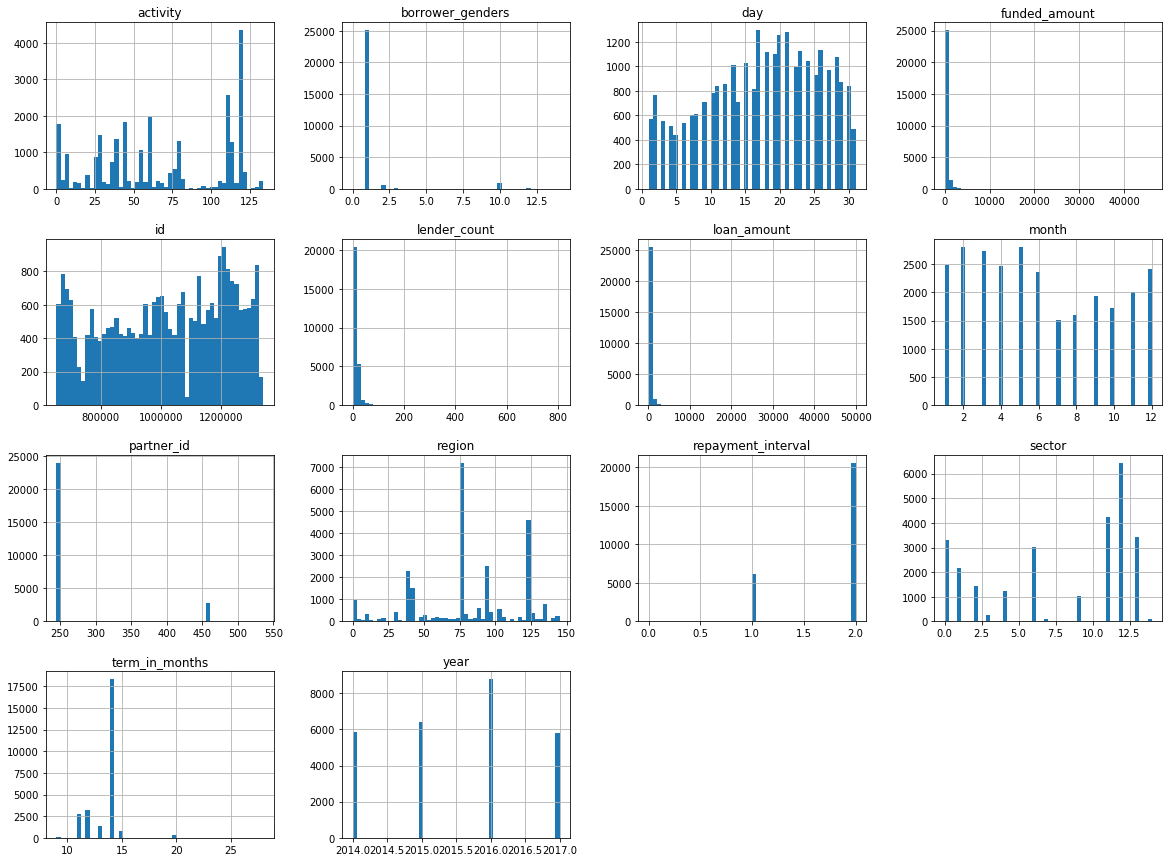

In [55]:
%matplotlib inline
transform_pak.hist(bins = 50, figsize = (20, 15))
plt.show()

In [56]:
correlation_matrix = transform_pak.corr()

In [57]:
correlation_matrix["region"].sort_values(ascending = False)

region                1.000000
sector                0.068145
activity              0.065791
day                  -0.007647
year                 -0.016468
lender_count         -0.016537
funded_amount        -0.018844
loan_amount          -0.021001
id                   -0.026563
month                -0.026758
borrower_genders     -0.036917
term_in_months       -0.079682
repayment_interval   -0.112931
partner_id           -0.173219
Name: region, dtype: float64

In [58]:
correlation_matrix["sector"].sort_values(ascending = False)

sector                1.000000
activity              0.655702
partner_id            0.104775
region                0.068145
day                   0.022132
month                -0.003707
year                 -0.032917
id                   -0.033000
funded_amount        -0.088392
loan_amount          -0.090576
borrower_genders     -0.093676
lender_count         -0.096474
repayment_interval   -0.143661
term_in_months       -0.163052
Name: sector, dtype: float64

In [59]:
correlation_matrix["term_in_months"].sort_values(ascending = False)

term_in_months        1.000000
repayment_interval    0.750563
id                    0.221221
year                  0.214923
lender_count          0.122632
funded_amount         0.092360
partner_id            0.084145
borrower_genders      0.070506
loan_amount           0.054073
day                   0.034035
month                 0.012961
region               -0.079682
activity             -0.127028
sector               -0.163052
Name: term_in_months, dtype: float64

In [60]:
# Next we need to visualize!